# CallMeMaybe

As an data analyst i have to find out the least effective operators and come up with suggestions and conclusions for the virtual telephony service CallMeMaybe. This comopany is developing a new function that will give supervisors information on the least effective operators. An operator is considered ineffective if they have a large number of missed incoming calls (internal and external) and a long waiting time for incoming calls. Moreover, if an operator is supposed to make outgoing calls, a small number of them is also a sign of ineffectiveness.

In [1]:
#import packages
import warnings
warnings.filterwarnings("ignore")

import six
import sys
sys.modules['sklearn.externals.six'] = six

import pandas as pd
import calendar
import numpy as np
import datetime
from datetime import datetime

from matplotlib import pyplot
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from pylab import rcParams
import plotly.graph_objs as go
import plotly.offline as pyoff


import scipy.stats as stats
import sklearn
from scipy.stats import ttest_rel, ttest_ind
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Description of the data
- Open the data files and study the general information

In [2]:
#open data files as clients and dataset
try:
    clients = pd.read_csv('C:/Users/andre/OneDrive/Desktop/practicum_100/Final_project/telecom_clients_us.csv')
    dataset = pd.read_csv('C:/Users/andre/OneDrive/Desktop/practicum_100/Final_project/telecom_dataset_us.csv')
except:
    clients = pd.read_csv('/datasets/telecom_clients_us.csv')
    dataset = pd.read_csv('/datasets/telecom_dataset_us.csv')

In [3]:
print('Info about dataset df')
print('df:clients')
display(clients.info())
print()

print('df:dataset')
display(dataset.info())
print()
print()

print('First 5 rows of dataset df')
print('df:clients')
display(clients.head())
print()

print('df:dataset')
display(dataset.head())
print()
print()

print('Last 5 rows of dataset df')
print('df:clients')
display(clients.tail())
print()

print('df:dataset')
display(dataset.tail())
print()
print()

print('sample row of dataset df')
print('df:clients')
display(clients.sample(5))
print()

print('df:dataset')
display(dataset.sample(5))

Info about dataset df
df:clients
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


None


df:dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


None



First 5 rows of dataset df
df:clients


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16



df:dataset


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25




Last 5 rows of dataset df
df:clients


,user_id,tariff_plan,date_start
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22
731,166565,B,2019-08-08



df:dataset


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53901,168606,2019-11-19 00:00:00+03:00,in,False,NaN,True,2,0,64




sample row of dataset df
df:clients


,user_id,tariff_plan,date_start
420,167507,C,2019-09-18
687,166550,B,2019-08-08
186,168256,C,2019-10-18
94,166939,C,2019-08-26
154,166782,C,2019-08-19



df:dataset


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
37987,167650,2019-10-04 00:00:00+03:00,out,False,921318.0,True,50,0,1125
51794,168336,2019-11-22 00:00:00+03:00,out,True,958416.0,True,1,0,0
34542,167497,2019-11-21 00:00:00+03:00,out,False,924954.0,True,2,0,28
2107,166406,2019-10-19 00:00:00+03:00,out,False,879896.0,True,6,0,138
47535,168187,2019-10-24 00:00:00+03:00,in,False,937736.0,False,8,779,848


#### clients
> 732 entries; 3 columns
- user_id: int64 
- tariff_plan: object
- date_start: object

#### dataset
> 53902 entries; 9 columns
- user_id: int64  
- date:  object 
- direction: object 
- internal: object 
- operator_id: float64
- is_missed_call: bool   
- calls_count: int64  
- call_duration: int64  
- total_call_duration: int64  

## Prepare the data
- Merging datafiles
- Convert the data to the required types and a description of the columns where the data types have been changed and why.
- Dealing with missing values.
- Dealing with values are missing
- Comparing call duration and missed calls - to drop corrupted data
- Building a correlation matrix and display it.
- Work only with parameters that are relevant

In [4]:
# merge datafiles 'clients' and 'dataset' into 'merge':
merge = dataset.merge(clients, right_on='user_id', left_on='user_id')
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53902 entries, 0 to 53901
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
 9   tariff_plan          53902 non-null  object 
 10  date_start           53902 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 4.6+ MB


In [5]:
#checking for missing values
rep = merge.isna().sum().to_frame()
rep = rep.rename(columns = {0: 'missing_values'})
rep['% of total'] = (rep['missing_values'] / merge.shape[0]*100).round(2)
display(rep.sort_values(by = 'missing_values', ascending = False))

,missing_values,% of total
operator_id,8172,15.16
internal,117,0.22
user_id,0,0.00
date,0,0.00
direction,0,0.00
is_missed_call,0,0.00
calls_count,0,0.00
call_duration,0,0.00
total_call_duration,0,0.00
tariff_plan,0,0.00


In [6]:
#drop missing values in operator_id and internal into new datafile 'df'
df = merge.dropna(subset=['operator_id', 'internal'])
display(df.head())
rep = df.isna().sum().to_frame()
rep = rep.rename(columns = {0: 'missing_values'})
rep['% of total'] = (rep['missing_values'] / df.shape[0]).round(2)
display(rep.sort_values(by = 'missing_values', ascending = False))

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,B,2019-08-01
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,B,2019-08-01


,missing_values,% of total
user_id,0,0.0
date,0,0.0
direction,0,0.0
internal,0,0.0
operator_id,0,0.0
is_missed_call,0,0.0
calls_count,0,0.0
call_duration,0,0.0
total_call_duration,0,0.0
tariff_plan,0,0.0


In [7]:
df.describe(include='all').round(2)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
count,45670.00,45670,45670,45670,45670.0,45670,45670.00,45670.00,45670.00,45670,45670
unique,NaN,118,2,2,NaN,2,NaN,NaN,NaN,3,65
top,NaN,2019-11-25 00:00:00+03:00,out,False,NaN,False,NaN,NaN,NaN,C,2019-10-16
freq,NaN,1083,31717,39861,NaN,30153,NaN,NaN,NaN,16329,2606
mean,167302.01,NaN,NaN,NaN,916529.3,NaN,16.93,1010.93,1323.70,NaN,NaN
std,600.84,NaN,NaN,NaN,21258.4,NaN,59.08,4017.10,4735.34,NaN,NaN
min,166377.00,NaN,NaN,NaN,879896.0,NaN,1.00,0.00,0.00,NaN,NaN
25%,166782.00,NaN,NaN,NaN,900788.0,NaN,1.00,0.00,68.00,NaN,NaN
50%,167175.00,NaN,NaN,NaN,913938.0,NaN,4.00,107.00,291.00,NaN,NaN
75%,167827.00,NaN,NaN,NaN,937708.0,NaN,14.00,774.00,1112.00,NaN,NaN


In [8]:
# change 'data_start' & 'date'  into datetime -> create new feature 'contact_date' with only the date from the feature 'date'
df['date_start'] = pd.to_datetime(df['date_start'],dayfirst =True)
df['date']=pd.to_datetime(df['date'],dayfirst =True)
df['contact_date']=pd.to_datetime(df['date'],dayfirst =True).dt.date
df.contact_date = pd.to_datetime(df.contact_date,dayfirst =True)

# change 'internal' & 'is_missed_call' into integer (0,1)
df[['internal', 'is_missed_call']] = df[['internal', 'is_missed_call']].astype(int)
df.head(3)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,contact_date
1,166377,2019-08-05 00:00:00+03:00,out,1,880022.0,1,3,0,5,B,2019-08-01,2019-08-05
2,166377,2019-08-05 00:00:00+03:00,out,1,880020.0,1,1,0,1,B,2019-08-01,2019-08-05
3,166377,2019-08-05 00:00:00+03:00,out,1,880020.0,0,1,10,18,B,2019-08-01,2019-08-05


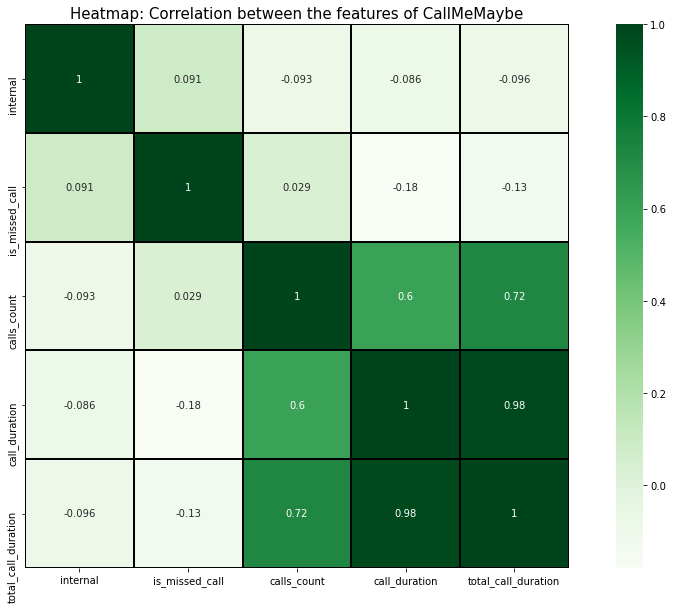

In [9]:
#to find out the correlation between the features except for user_id & operator_id
#create heatmap
plt.figure(figsize=(17, 10))

sns.heatmap(df.drop(['user_id', 'operator_id'], axis=1).corr(), annot=True, fmt='.2g', cmap= 'Greens', linewidths=1, linecolor='black',square=True)
plt.title("Heatmap: Correlation between the features of CallMeMaybe", fontsize = 15)

plt.show()

there exists no correlation between the features except in:
- 'call_duration' and 'total_call_duration' with 0.98: needed to find out the waiting time (not droped)
- 'calls_count' and 'total_call_duration' with 0.72: 'calls count needed to find out the ratio of 'is_missed_call' and 'internal' ( not droped)
- 'calls_count' and 'call_duration' (not droped) with 0.6

In [10]:
#checking the data for that creating new dataframes (dur_count_out) for outgoing and incoming calls is created
#outgoing calls
dur_count_out = df[df['direction'] == 'out'].groupby(['operator_id']).agg({
            #summarize total call duration and call duration by each operator
            'total_call_duration': 'sum',
            'call_duration': 'sum',
            #calculate the sum of calls made by each operator
            'calls_count':'sum',
            #create feature for the first contact date of each operatoer & calculate the sum of each contact of an operator on each day
            'contact_date': ['first', 'nunique'],
            'contact_date': 'count'}).reset_index()

#create colum for waiting by subracting 'call_duration' from 'total_call_duration'
dur_count_out['waiting'] = dur_count_out['total_call_duration'] - dur_count_out['call_duration']
display(dur_count_out.sort_values('waiting', ascending = False).head())
print(dur_count_out.shape)

#incoming calls
dur_count_in =df[df['direction'] == 'in'].groupby(['operator_id']).agg({
            #summarize total call duration and call duration by each operator
            'total_call_duration': 'sum',
            'call_duration': 'sum',
            #calculate the sum of calls made by each operator   
            'calls_count':'sum',
            #create feature for the first contact date of each operatoer & calculate the sum of each contact of an operator on each day
            'contact_date': ['first', 'nunique'],
            'contact_date': 'count'}).reset_index()
        
#create colum for waiting by subracting 'call_duration' from 'total_call_duration'
dur_count_in['waiting'] = dur_count_in['total_call_duration'] - dur_count_in['call_duration']
display(dur_count_in.sort_values('waiting', ascending = False).head())
print(dur_count_in.shape)

,operator_id,total_call_duration,call_duration,calls_count,contact_date,waiting
25,885890.0,5153731,3579710,64653,174,1574021
24,885876.0,6120655,4594774,64897,216,1525881
446,925922.0,1357053,893416,21754,50,463637
466,929428.0,666374,293600,24572,70,372774
465,929426.0,505317,279791,12041,68,225526


(882, 6)


,operator_id,total_call_duration,call_duration,calls_count,contact_date,waiting
335,919790.0,179175,119669,1790,68,59506
288,913938.0,434629,389685,5221,84,44944
334,919554.0,172830,129346,1345,83,43484
333,919552.0,198611,156354,1237,74,42257
337,919794.0,140845,102382,1327,37,38463


(754, 6)


In [11]:
#delete waiting = 0, because this is impossible, that a call has a waiting time of 0
dur_count_in= dur_count_in[(dur_count_in['waiting'] > 0)]
dur_count_out= dur_count_out[(dur_count_out['waiting'] > 0)]
print(dur_count_out.shape)
print(dur_count_in.shape)

(874, 6)
(754, 6)


In [12]:
#drop contact date with only 1 day with total_call_duration of more than 0 
dur_count_out= dur_count_out[(dur_count_out['contact_date'] >= 1) & (dur_count_out['total_call_duration'] != 0)]
dur_count_in= dur_count_in[(dur_count_in['contact_date'] != 1) & (dur_count_in['total_call_duration'] != 0)]
print(dur_count_out.shape)
print(dur_count_in.shape)
display(dur_count_out.sort_values (by = ['total_call_duration'], ascending = False). tail())
display(dur_count_in.sort_values (by = ['total_call_duration'], ascending = False). tail())

(874, 6)
(658, 6)


,operator_id,total_call_duration,call_duration,calls_count,contact_date,waiting
654,941826.0,2,0,1,1,2
297,914440.0,2,0,1,1,2
706,945898.0,1,0,3,1,1
710,946072.0,1,0,1,1,1
427,924572.0,1,0,1,1,1


,operator_id,total_call_duration,call_duration,calls_count,contact_date,waiting
676,952968.0,35,25,2,2,10
477,935216.0,30,20,2,2,10
612,944908.0,30,3,2,2,27
675,952954.0,26,23,3,3,3
127,900192.0,14,4,2,2,10


In [13]:
# to find out if the extreme call duration 144395.00 and total call duration 166155.00 makes any sense;

# 1. the ratio of the waiting time to the total call duration is created (per operator)
dur_count_out['ratio_waiting'] = dur_count_out['waiting']/ dur_count_out['total_call_duration']
# 2. feature for the number of calls per day and operator is created 
# (by dividing the number of calls is divided by contact date)
dur_count_out['contact_per_day'] = dur_count_out['calls_count']/dur_count_out['contact_date']
# 3. the duration of calls per day per operator is calucalted
dur_count_out['dur_per_day'] = dur_count_out['total_call_duration']/dur_count_out['contact_date']
# 4. Finally the sum of the duration of the calls per day is divided by the calls per day
# to get the average duration per call 
dur_count_out['dur_per_call_day'] = dur_count_out['dur_per_day']/dur_count_out['contact_per_day']
display(dur_count_out.describe().round(2))



# 1. the ratio of the waiting time to the total call duration is created (per operator)
dur_count_in['ratio_waiting'] = dur_count_in['waiting']/ dur_count_in['total_call_duration']
# 2. feature for the number of calls per day and operator is created 
# (by dividing the number of calls is divided by contact date)
dur_count_in['contact_per_day'] = dur_count_in['calls_count']/dur_count_in['contact_date']
# 3. the duration of calls per day per operator is calucalted
dur_count_in['dur_per_day'] = dur_count_in['total_call_duration']/dur_count_in['contact_date']
# 4. Finally the sum of the duration of the calls per day is divided by the calls per day
# to get the average duration per call 
dur_count_in['dur_per_call_day'] = dur_count_in['dur_per_day']/dur_count_in['contact_per_day']
display(dur_count_in.describe().round(2))




,operator_id,total_call_duration,call_duration,calls_count,contact_date,waiting,ratio_waiting,contact_per_day,dur_per_day,dur_per_call_day
count,874.00,874.00,874.00,874.00,874.00,874.00,874.00,874.00,874.00,874.00
mean,925552.14,55586.18,40800.87,765.81,36.28,14785.31,0.33,14.73,1011.22,77.62
std,22859.13,282342.27,205313.38,3452.09,42.02,78923.89,0.25,32.94,2171.50,83.04
min,879896.00,1.00,0.00,1.00,1.00,1.00,0.02,1.00,1.00,0.33
25%,906392.50,607.00,412.00,13.00,6.00,150.25,0.15,2.00,91.67,37.85
50%,924957.00,8845.50,6752.00,105.50,21.00,1452.50,0.25,3.67,323.74,62.40
75%,942831.00,49595.50,35145.00,662.75,50.00,11315.75,0.41,13.74,1063.72,90.63
max,973120.00,6120655.00,4594774.00,64897.00,246.00,1574021.00,1.00,435.08,29619.14,1338.00


,operator_id,total_call_duration,call_duration,calls_count,contact_date,waiting,ratio_waiting,contact_per_day,dur_per_day,dur_per_call_day
count,658.00,658.00,658.00,658.00,658.00,658.00,658.00,658.00,658.00,658.00
mean,922315.56,18014.83,15949.33,157.24,21.06,2065.50,0.19,4.60,511.39,116.28
std,22124.32,44038.98,40042.86,418.07,21.95,5460.60,0.15,8.73,898.19,71.08
min,879896.00,14.00,3.00,2.00,2.00,3.00,0.00,1.00,7.00,7.00
25%,904039.50,619.00,482.50,8.00,5.00,113.25,0.09,1.33,117.06,70.06
50%,921816.00,3033.00,2456.00,26.00,13.00,399.00,0.15,1.93,232.35,102.52
75%,939216.50,13028.50,11844.00,117.00,31.00,1513.25,0.25,4.13,527.17,147.05
max,972460.00,465762.00,459139.00,5221.00,119.00,59506.00,0.90,114.17,12937.83,615.00


In [14]:
display(dur_count_out.sort_values (by = 'total_call_duration', ascending = False).head(10))
dur_count_in.sort_values (by = 'total_call_duration', ascending = False).head(10)

#it shows that the call duration for the operator with  high total_call duration have not a high mean call duration per call.

,operator_id,total_call_duration,call_duration,calls_count,contact_date,waiting,ratio_waiting,contact_per_day,dur_per_day,dur_per_call_day
24,885876.0,6120655,4594774,64897,216,1525881,0.249300,300.449074,28336.365741,94.313373
25,885890.0,5153731,3579710,64653,174,1574021,0.305414,371.568966,29619.143678,79.713718
446,925922.0,1357053,893416,21754,50,463637,0.341650,435.080000,27141.060000,62.381769
466,929428.0,666374,293600,24572,70,372774,0.559407,351.028571,9519.628571,27.119241
693,945302.0,546264,391291,7059,82,154973,0.283696,86.085366,6661.756098,77.385465
465,929426.0,505317,279791,12041,68,225526,0.446306,177.073529,7431.132353,41.966365
255,908640.0,500292,320556,16699,52,179736,0.359262,321.134615,9621.000000,29.959399
696,945310.0,430896,352164,3580,49,78732,0.182717,73.061224,8793.795918,120.362011
1,879898.0,382990,271823,7856,187,111167,0.290261,42.010695,2048.074866,48.751273
683,945278.0,375704,238497,4314,48,137207,0.365200,89.875000,7827.166667,87.089476


,operator_id,total_call_duration,call_duration,calls_count,contact_date,waiting,ratio_waiting,contact_per_day,dur_per_day,dur_per_call_day
674,952948.0,465762,459139,4110,36,6623,0.014220,114.166667,12937.833333,113.324088
288,913938.0,434629,389685,5221,84,44944,0.103408,62.154762,5174.154762,83.246313
154,901880.0,300238,289480,2062,119,10758,0.035832,17.327731,2523.008403,145.605238
358,921318.0,271466,235050,2481,56,36416,0.134146,44.303571,4847.607143,109.417977
289,913942.0,252858,221281,2641,90,31577,0.124880,29.344444,2809.533333,95.743279
570,940588.0,224696,217303,2382,59,7393,0.032902,40.372881,3808.406780,94.330814
445,931458.0,215255,179237,2127,53,36018,0.167327,40.132075,4061.415094,101.201222
577,940630.0,199647,190981,2100,51,8666,0.043407,41.176471,3914.647059,95.070000
76,893804.0,199358,185856,2632,116,13502,0.067727,22.689655,1718.603448,75.743921
333,919552.0,198611,156354,1237,74,42257,0.212763,16.716216,2683.932432,160.558610


In [15]:
display(dur_count_out.sort_values (by = 'dur_per_call_day', ascending = False).head(10))
dur_count_in.sort_values (by = 'dur_per_call_day', ascending = False).head(10)



,operator_id,total_call_duration,call_duration,calls_count,contact_date,waiting,ratio_waiting,contact_per_day,dur_per_day,dur_per_call_day
64,891192.0,1338,1306,1,1,32,0.023916,1.000000,1338.000000,1338.000000
475,930326.0,698,683,1,1,15,0.021490,1.000000,698.000000,698.000000
326,917890.0,1320,1294,2,2,26,0.019697,1.000000,660.000000,660.000000
327,918390.0,132213,128132,262,77,4081,0.030867,3.402597,1717.051948,504.629771
121,897894.0,9496,9230,19,5,266,0.028012,3.800000,1899.200000,499.789474
57,891154.0,275361,264526,603,133,10835,0.039348,4.533835,2070.383459,456.651741
867,969600.0,12961,12570,29,3,391,0.030167,9.666667,4320.333333,446.931034
44,890232.0,17297,16768,39,17,529,0.030583,2.294118,1017.470588,443.512821
263,909452.0,3509,3394,8,1,115,0.032773,8.000000,3509.000000,438.625000
273,910926.0,10439,10125,25,7,314,0.030080,3.571429,1491.285714,417.560000


,operator_id,total_call_duration,call_duration,calls_count,contact_date,waiting,ratio_waiting,contact_per_day,dur_per_day,dur_per_call_day
122,899898.0,1230,1180,2,2,50,0.040650,1.000000,615.000000,615.000000
406,927142.0,2387,2372,4,4,15,0.006284,1.000000,596.750000,596.750000
711,958478.0,3514,3277,7,5,237,0.067445,1.400000,702.800000,502.000000
237,907974.0,1310,1281,3,3,29,0.022137,1.000000,436.666667,436.666667
240,907994.0,16877,16107,42,29,770,0.045624,1.448276,581.965517,401.833333
235,907970.0,6908,6593,18,16,315,0.045599,1.125000,431.750000,383.777778
437,930660.0,1455,1429,4,2,26,0.017869,2.000000,727.500000,363.750000
49,890412.0,9993,9490,29,9,503,0.050335,3.222222,1110.333333,344.586207
234,907964.0,6276,5968,19,14,308,0.049076,1.357143,448.285714,330.315789
257,909768.0,4489,3901,14,14,588,0.130987,1.000000,320.642857,320.642857


In [16]:
# as calculated beforhad, we make our dataframe more relatably by calculating the waiting time ('waiting') and creating parameter
# than droping zero waiting time => impossible
# droping missed calls with a total call duration of 0
# created feature ratio waiting by comparing waiting with total call duration
# finally dropping incoming calls with 100 % waiting time

df['waiting'] = df['total_call_duration'] - df['call_duration']
df = df.drop(df[(df['is_missed_call'] == 1) & (df['total_call_duration'] <= 0)].index)
df= df[(df['total_call_duration'] != 0)]
df= df[(df['waiting'] > 0)]


df['ratio_waiting'] = df['waiting']/ df['total_call_duration']
df = df.drop(df[(df['direction'] == 'in') & (df['ratio_waiting'] == 1)].index)
df.shape

(44237, 14)

In [17]:
df.shape


(44237, 14)

#### merge datafiles 'clients' and 'dataset' into 'merge'
> 53902 entries; 11 columns
- user_id: int64 
- date:  object - 118 unique  - '2019-11-25 00:00:00+03:00' (top - 1083 entries)
- direction: object - 2 unique - 'out' (top - 31717 entries)
- internal: object  - 2 unique - 'False' (top - 39861 entries)
- operator_id: float64 
- is_missed_call: bool  - 2 unique - 'False' (top - 30153 entries) 
- calls_count: int64  -min: 1 -  mean: 16.93 - median: 4 - max: 4817
- call_duration: int64  - min: 0 - mean: 1010.93 - median: 107 - max: 144395
- total_call_duration: int64 - min: 0 - mean: 1323.70 - median: 291 - max: 166155
- tariff_plan: object - 3 unique - 'C' (top - 16329)
- date_start: object - 65 unique - '2019-10-16' (top - 2606)

#### missing values found in 
- operator_id: with 8172 entries = 15.16 %
- internal: with 117 entries = 0.22 %
> drop missing values in operator_id and internal - reduces entries from 53902 into 45670


#### change datatypes
- 'data_start' & 'date'  into datetime -> create new feature 'caontact_date' with only the date from the feature 'date'
- 'internal' & 'is_missed_call' into integer (0,1)

#### finding out the correlation between the features by creating heatmap
> there exists no correlation between the features except in:
- 'call_duration' and 'total_call_duration' with 0.98: needed to find out the waiting time (not droped)
- 'calls_count' and 'total_call_duration' with 0.72: 'calls count needed to find out the ratio of 'is_missed_call' and 'internal' ( not droped)
- 'calls_count' and 'call_duration' (not droped) with 0.6

#### checking for corruption & outliers
- checking the data for that creating new dataframes (dur_count_out) for outgoing and incoming calls is created
> summarize total call duration and call duration by each operator                                                     
calculate the sum of calls made by each operator                                                                       
create feature for the first contact date of each operator & calculate the sum of each contact of an operator on each day (                      
create colum for waiting by subracting 'call_duration' from 'total_call_duration' 
- outgoing shape 882 entries, 6 columns; incoming shape 754 entries, 6 columns
- delete waiting = 0, because this is impossible, that a call has a waiting time of 0
- drop index with contact date with only 1 day with total_call_duration of more than 0 

- Finding out if the extreme call duration 144395.00 and total call duration 166155.00 makes any sense;
1. the ratio of the waiting time to the total call duration is created (per operator) (ratio_waiting)
2. feature for the number of calls per day and operator is created (by dividing the number of calls is divided by contact date) (contact_per_day)
3. the duration of calls per day per operator is calucalted (dur_per_day)
4. Finally the sum of the duration of the calls per day is divided by the calls per day to get the average duration per call  (dur_per_call_day)
> it shows that the call duration for the operator with  high total_call duration have not a high mean call duration per call.



DATAFRAME DF
- as calculated beforhead, we make our dataframe more relatably by calculating the waiting time ('waiting') and creating parameter
- than droping zero waiting time => impossible
- droping missed calls with a total call duration of 0
- created feature ratio waiting by comparing waiting with total call duration
- finally dropping incoming calls with 100 % waiting time
Final Shape 44237 entries , 14 columns


## Analyze the data


### Take a look at the Calls by type, number of calls over time (daily) (incoming and outgoing; internal and external)

In [18]:
# minimun contact_date
display(df.contact_date.min())
# maximum contact_date
display(df.contact_date.max())

Timestamp('2019-08-02 00:00:00')

Timestamp('2019-11-28 00:00:00')

In [19]:
# find out daily_calls by grouping call_count by contact date
daily_calls = (df.groupby(['contact_date']).agg({
    'calls_count' : 'sum',
    'operator_id' : 'nunique'}).reset_index())
daily_calls['calls_per_operator'] = daily_calls['calls_count'] / daily_calls['operator_id']
display(daily_calls.sort_values(by = ('calls_count'), ascending=False).tail())



,contact_date,calls_count,operator_id,calls_per_operator
3,2019-08-05,191,4,47.750000
1,2019-08-03,27,2,13.500000
0,2019-08-02,19,3,6.333333
8,2019-08-10,5,3,1.666667
2,2019-08-04,4,2,2.000000


In [20]:
# creating df for internal, external, outgoing (out), incoming (in_), missed and not missed calls grouped by contact date.

daily_intern = (df[df['internal'] == 1].groupby(['contact_date']).agg({
    'calls_count' : 'sum',
    'operator_id' : 'nunique'})).reset_index()
daily_intern['calls_per_operator'] = daily_intern['calls_count'] / daily_intern['operator_id']
      
daily_extern = (df[df['internal'] == 0].groupby(['contact_date']).agg({
    'calls_count' : 'sum',
    'operator_id' : 'nunique'})).reset_index()
daily_extern['calls_per_operator'] = daily_extern['calls_count'] / daily_extern['operator_id']

daily_out = (df[df['direction'] == 'out'].groupby(['contact_date']).agg({
    'calls_count' : 'sum',
    'operator_id' : 'nunique'})).reset_index()
daily_out['calls_per_operator'] = daily_out['calls_count'] / daily_out['operator_id']

daily_in = (df[df['direction'] == 'in'].groupby(['contact_date']).agg({
    'calls_count' : 'sum',
    'operator_id' : 'nunique'})).reset_index()
daily_in['calls_per_operator'] = daily_in['calls_count'] / daily_in['operator_id']

daily_missed = (df[df['is_missed_call'] == 1].groupby(['contact_date']).agg({
    'calls_count' : 'sum',
    'operator_id' : 'nunique'})).reset_index()
daily_missed['calls_per_operator'] = daily_missed['calls_count'] / daily_missed['operator_id']

daily_not_missed = (df[df['is_missed_call'] == 0].groupby(['contact_date']).agg({
    'calls_count' : 'sum',
    'operator_id' : 'nunique'})).reset_index()
daily_not_missed['calls_per_operator'] = daily_not_missed['calls_count'] / daily_not_missed['operator_id']



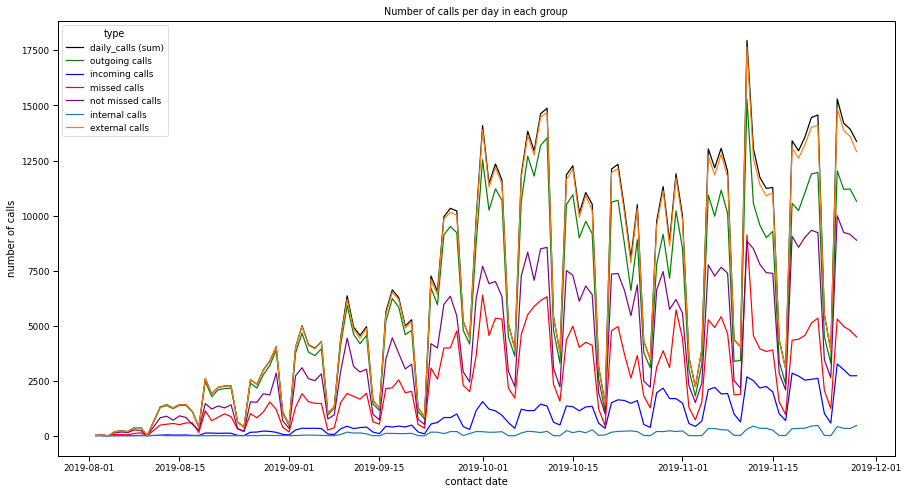

In [21]:
# Plotting daily contact by internal, external, outgoing (out), incoming (in_), missed and not missed calls and sum of calls with lineplot
sns.set_context("paper", rc={"axes.labelsize":10})

plt.figure(figsize=(15,8))
plt.plot(daily_calls['contact_date'], daily_calls['calls_count'],label = 'daily_calls (sum)', color = 'black')
plt.plot(daily_out['contact_date'], daily_out['calls_count'], label='outgoing calls', color = 'green')
plt.plot(daily_in['contact_date'], daily_in['calls_count'], label = 'incoming calls', color = 'blue')
plt.plot(daily_missed['contact_date'], daily_missed['calls_count'], label='missed calls', color = 'red')
plt.plot(daily_not_missed['contact_date'], daily_not_missed['calls_count'], label = 'not missed calls', color = 'purple')
plt.plot(daily_intern['contact_date'], daily_intern['calls_count'], label='internal calls')
plt.plot(daily_extern['contact_date'], daily_extern['calls_count'], label = 'external calls')

plt.xlabel('contact date') 
plt.ylabel('number of calls')
plt.title('Number of calls per day in each group')
plt.legend(title = 'type')
plt.show()

minimum contact date = '2019-08-02', maximum contact date = '2019-11-28'                                                      
The number of calls in all call types and sum calls is increasing over time. Only in October there is no really a growth in the call volume. In November  exits a peak with more than 17500 call in a day. The call type with the lowest number are internal calls, followed by missed_calls and incoming calls. The highest number of calls can be found in external calls, followed by not missed calls and outgoing calls.

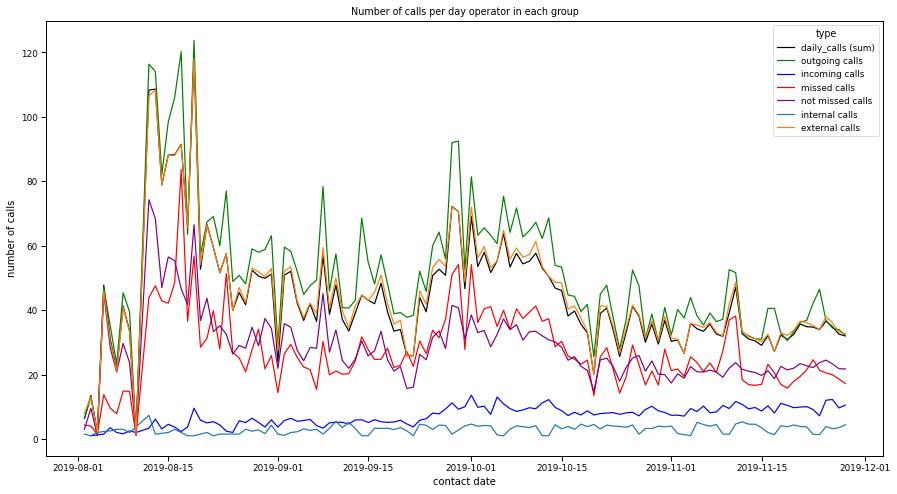

In [22]:
# Plotting daily contact by internal, external, outgoing (out), incoming (in_), missed and not missed calls and sum of calls with lineplot
sns.set_context("paper", rc={"axes.labelsize":10})

plt.figure(figsize=(15,8))
plt.plot(daily_calls['contact_date'], daily_calls['calls_per_operator'],label = 'daily_calls (sum)', color = 'black')
plt.plot(daily_out['contact_date'], daily_out['calls_per_operator'], label='outgoing calls', color = 'green')
plt.plot(daily_in['contact_date'], daily_in['calls_per_operator'], label = 'incoming calls', color = 'blue')
plt.plot(daily_missed['contact_date'], daily_missed['calls_per_operator'], label='missed calls', color = 'red')
plt.plot(daily_not_missed['contact_date'], daily_not_missed['calls_per_operator'], label = 'not missed calls', color = 'purple')
plt.plot(daily_intern['contact_date'], daily_intern['calls_per_operator'], label='internal calls')
plt.plot(daily_extern['contact_date'], daily_extern['calls_per_operator'], label = 'external calls')

plt.xlabel('contact date') 
plt.ylabel('number of calls')
plt.title('Number of calls per day operator in each group')
plt.legend(title = 'type')
plt.show()

The mean number of calls per operator over time has three peaks of about 120 calls per operator this decreases until the beginning of october with short peak, from there it is decreasing again. 

The highest number of calls can be found in outgoing calls the lowest number of call are internal calls and incoming calls.

It can be said in comparision with the graph:'Number of calls in each group', that the number of operator is rising over time.

### Take a look on calls by type: incoming and outgoing; internal and external & missed calls


In [23]:

internal = df.groupby(['internal']).agg({
    'calls_count' : 'sum',
    'operator_id' : 'count'})
internal['ratio_call_type'] = (internal.calls_count)/sum(internal.calls_count)
direction = df.groupby(['direction']).agg({
    'calls_count' : 'sum',
    'operator_id' : 'count'})
direction['ratio_call_type'] = (direction.calls_count)/sum(direction.calls_count)

missed = df.groupby(['is_missed_call']).agg({
    'calls_count' : 'sum',
    'operator_id' : 'count'})
missed['ratio_call_type'] = (missed.calls_count)/sum(missed.calls_count)

display(internal, direction, missed)

,calls_count,operator_id,ratio_call_type
internal,,,
0,757267,39249,0.982651
1,13370,4988,0.017349


,calls_count,operator_id,ratio_call_type
direction,,,
in,103039,13499,0.133706
out,667598,30738,0.866294


,calls_count,operator_id,ratio_call_type
is_missed_call,,,
0,473292,30116,0.614157
1,297345,14121,0.385843


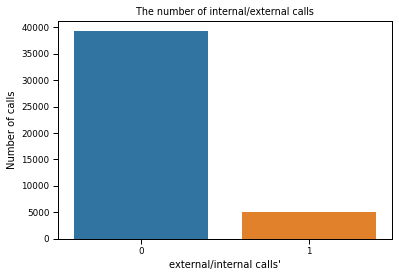

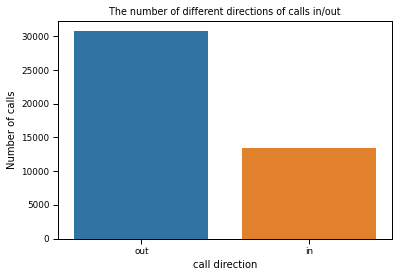

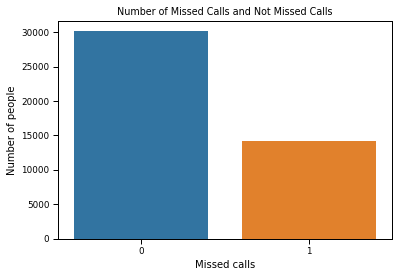

In [24]:
sns.set_context("paper", rc={"axes.labelsize":10})

sns.countplot(data=df, x='internal')
plt.xlabel("external/internal calls'")
plt.ylabel("Number of calls")
plt.title("The number of internal/external calls")
plt.show()

sns.countplot(data=df, x='direction')
plt.xlabel("call direction")
plt.ylabel("Number of calls")
plt.title("The number of different directions of calls in/out")
plt.show()

sns.countplot(data=df, x='is_missed_call')
plt.xlabel("Missed calls")
plt.ylabel("Number of people")
plt.title("Number of Missed Calls and Not Missed Calls")
plt.show()

In the countplot:
- the number of internal calls are 756850 (98.28 %) and the external calls are 38963 (0.02 %).
- the number of call directions are 102605 (13.32 %) incoming and the number of outgoing calls are 667505(86.68 %).
- the number of missed calls are 296818 (38.54 %) and the number of not missed calls are 473292 (61.46 %)

 

In [25]:
#creating new df 'out_op' with only outgoing calls by grouping by operator with values of 
#- min, max, mean, standardvariation of 'total_call_duration'
#- sum internal calls
#- summ all calls
#- first and each contact date

#out_op = df[df['direction'] == 'out'].groupby(['operator_id']).agg(
 #   {
        # Find the min, max, and sum of the duration column
  #      'total_call_duration': [min, max, 'mean','std'],
        # find the number of network type entries
   #     'internal': 'sum',
    #    'calls_count':'sum',
        # minimum, first, and number of unique dates
     #   'contact_date': ['first', 'nunique']
    #}
#).reset_index()

# renaming the featurs: 
# 'operator_id', 'min_call_duration', 'max_call_duration',  'mean_call_duration_out', 
# 'std_call_duration', 'internal_calls', 'total_calls_out', 'first_day', 'number_of_days'

#out_op.columns  =['operator_id', 'min_call_duration', 'max_call_duration',  'mean_call_duration_out', 'std_call_duration', 'internal_calls', 'total_calls_out', 'first_day', 'number_of_days']
#out_op.info()

out_op = df[df['direction'] == 'out'].groupby(['operator_id']).agg(
    {
        # Find the min, max, and sum of the duration column
        'total_call_duration': [min, max, 'mean','std'],
        # find the number of network type entries
        # 'internal': 'sum',
        'calls_count':'sum',
        # minimum, first, and number of unique dates
        'contact_date': ['first', 'nunique']
    }
).reset_index()

out_op_internal = df[(df['direction'] == 'out') & (df['internal'] == 1)].groupby(['operator_id']).agg(
    {
        'calls_count':'sum',
    }
).reset_index()

out_op_missing = df[(df['direction'] == 'out') & (df['is_missed_call'] == 1)].groupby(['operator_id']).agg(
    {
        'calls_count':'sum',
    }
).reset_index()

out_op.columns  = ['operator_id', 'min_call_duration', 'max_call_duration',  'mean_call_duration_out', 'std_call_duration', 'total_calls_out', 'first_day', 'number_of_days']
out_op = out_op.merge(out_op_internal, on = 'operator_id', how = 'left')
out_op = out_op.merge(out_op_missing, on = 'operator_id', how = 'left')
out_op = out_op.rename(columns={"calls_count_x": "internal_calls_out", "calls_count_y": "missed_calls_out"}, errors="raise")
out_op['internal_calls_out'] = out_op['internal_calls_out'].fillna(0)
out_op['missed_calls_out'] = out_op['missed_calls_out'].fillna(0)

out_op.head()

,operator_id,min_call_duration,max_call_duration,mean_call_duration_out,std_call_duration,total_calls_out,first_day,number_of_days,internal_calls_out,missed_calls_out
0,879896.0,1,11714,884.912621,2003.387534,1069,2019-08-02,49,56.0,253.0
1,879898.0,1,9959,2070.216216,2248.488784,7854,2019-08-02,82,17.0,2592.0
2,880020.0,1,819,170.923077,279.550670,44,2019-08-05,7,2.0,28.0
3,880022.0,1,2419,350.079365,487.179417,201,2019-08-05,36,5.0,108.0
4,880026.0,1,3654,1135.408284,1115.003841,2399,2019-08-07,77,8.0,681.0


In [26]:
#creating new df 'in_op' with only incoming calls by grouping by operator with values of 
#- min, max, mean, standardvariation, sum of 'total_call_duration'
#- sum call duration
#- sum internal calls
#- summ all calls
#- first and each contact date

#in_op = df[df['direction'] == 'in'].groupby(['operator_id']).agg(
 #   {
  #      # Find the min, max, and sum of the duration column
   #     'total_call_duration': [min, max, 'mean', 'std', 'sum'],
    #    'call_duration': 'sum',
        # find the number of network type entries
     #   'is_missed_call': 'sum',
      #  'calls_count':'sum',

        # minimum, first, and number of unique dates
       # 'contact_date': ['first', 'nunique']
    #}
#).reset_index()

# renaming the featurs: 
# 'operator_id', 'min_call_duration', 'max_call_duration', 'mean_call_duration_in', 'std_call_duration', 
# 'total_call_duration', 'call_duration','missed_calls', 'total_calls', 'first_day', 'number_of_days'

#in_op.columns  =['operator_id', 'min_call_duration', 'max_call_duration', 'mean_call_duration_in', 'std_call_duration', 'total_call_duration', 'call_duration','missed_calls', 'total_calls', 'first_day', 'number_of_days']
#in_op[in_op['missed_calls.head()
            
            
            
in_op = df[df['direction'] == 'in'].groupby(['operator_id']).agg(
    {
        # Find the min, max, and sum of the duration column
        'total_call_duration': [min, max, 'mean','std', 'sum'],
        'call_duration': 'sum',
        # find the number of network type entries
        # 'internal': 'sum',
        'calls_count':'sum',
        # minimum, first, and number of unique dates
        'contact_date': ['first', 'nunique']
    }
).reset_index()

in_op_internal = df[(df['direction'] == 'in') & (df['is_missed_call'] == 1)].groupby(['operator_id']).agg(
    {
        'calls_count':'sum',
    }
).reset_index()

in_op_missing = df[(df['direction'] == 'in') & (df['is_missed_call'] == 1)].groupby(['operator_id']).agg(
    {
        'calls_count':'sum',
    }
).reset_index()


in_op.columns  = ['operator_id', 'min_call_duration', 'max_call_duration',  'mean_call_duration_in', 'std_call_duration', 'total_call_duration', 'call_duration','total_calls_in', 'first_day', 'number_of_days']
in_op = in_op.merge(in_op_internal, on = 'operator_id', how = 'left')
in_op = in_op.merge(in_op_missing, on = 'operator_id', how = 'left')
in_op = in_op.rename(columns={"calls_count_x": "internal_calls_in", "calls_count_y": "missed_calls_in"}, errors="raise")
in_op['internal_calls_in'] = in_op['internal_calls_in'].fillna(0)
in_op['missed_calls_in'] = in_op['missed_calls_in'].fillna(0)
in_op.head()

,operator_id,min_call_duration,max_call_duration,mean_call_duration_in,std_call_duration,total_call_duration,call_duration,total_calls_in,first_day,number_of_days,internal_calls_in,missed_calls_in
0,879896.0,15,1427,273.086957,348.309934,6281,5662,60,2019-08-03,21,0.0,0.0
1,879898.0,13,455,140.492063,121.331972,8851,7053,117,2019-08-05,56,0.0,0.0
2,880020.0,28,70,50.250000,12.162589,402,344,8,2019-08-22,7,0.0,0.0
3,880022.0,26,158,78.000000,59.387348,624,512,8,2019-10-15,8,0.0,0.0
4,880026.0,12,568,93.789474,124.744441,1782,1632,25,2019-08-14,18,0.0,0.0


#### Data Preperationa for defining 'calls per day', 'ratio_missed_in' & 'waiting_time_call_in'


In [27]:
# drop operator with maximum call duration = minimum call duration (indicator for only one call)
# also drop operator with under 2 working days before the last week of the dataframe - worked only over a very short period of time
out_oper = out_op[out_op['max_call_duration']!=out_op['min_call_duration']]
out_operator = out_oper.drop(out_oper[(out_oper['number_of_days'] < 2) & (out_oper['first_day'] < '2019-11-21')].index).sort_values(by = ('first_day'))

# define 'calls_per_day' by calculating the sum of calls per operator divided by number of days working as integer
out_operator['calls_per_day'] = (out_operator['total_calls_out']/out_operator['number_of_days']).apply(np.int64)



# drop operator with maximum call duration = minimum call duration (indicator for only one call)
# also drop operator with under 2 working days before the last week of the dataframe - worked only over a very short period of time
in_oper = in_op[in_op['max_call_duration']!=in_op['min_call_duration']]
in_operator = in_oper.drop(in_oper[(in_oper['number_of_days'] < 2) & (in_oper['first_day'] < '2019-11-21')].index).sort_values(by = ('first_day'))

# define 'ratio_missed_in' by deviding missed incoming calls by total calls
in_operator['ratio_missed_in'] = in_operator['missed_calls_in']/in_operator['total_calls_in']

#define 'waiting_time_call_in' by deviding waiting time (total call duration - call duration) by total calls
in_operator['waiting_time_call_in'] = (in_operator['total_call_duration'] - in_operator['call_duration'])/in_oper['total_calls_in']




In [28]:
# use describe to get an overview over the dataframes out_op (outgoing calls per operator) & in_op (incoming calls per operator)
print('outgoing')
display(out_operator['calls_per_day'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9]).round(2))
print('incoming')
display(in_operator['ratio_missed_in'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9]).round(2))
display(in_operator['waiting_time_call_in'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9]).round(2))


outgoing


count    758.00
mean      36.35
std       78.87
min        1.00
10%        2.00
20%        3.00
30%        4.00
40%        6.00
50%        9.00
60%       15.00
70%       29.00
80%       49.60
90%      110.00
max      906.00
Name: calls_per_day, dtype: float64

incoming


count    635.00
mean       0.01
std        0.04
min        0.00
10%        0.00
20%        0.00
30%        0.00
40%        0.00
50%        0.00
60%        0.00
70%        0.00
80%        0.00
90%        0.01
max        0.50
Name: ratio_missed_in, dtype: float64

count    635.00
mean      17.32
std       11.94
min        0.70
10%        6.54
20%        8.66
30%       10.66
40%       12.70
50%       14.41
60%       16.53
70%       19.14
80%       23.89
90%       32.35
max      115.50
Name: waiting_time_call_in, dtype: float64

#### data preperation for merging dataframes out operator and in operator


In [29]:
in_operator.head()

,operator_id,min_call_duration,max_call_duration,mean_call_duration_in,std_call_duration,total_call_duration,call_duration,total_calls_in,first_day,number_of_days,internal_calls_in,missed_calls_in,ratio_missed_in,waiting_time_call_in
0,879896.0,15,1427,273.086957,348.309934,6281,5662,60,2019-08-03,21,0.0,0.0,0.0,10.316667
1,879898.0,13,455,140.492063,121.331972,8851,7053,117,2019-08-05,56,0.0,0.0,0.0,15.367521
6,882476.0,24,186,95.666667,82.597417,287,192,3,2019-08-06,3,0.0,0.0,0.0,31.666667
8,882680.0,19,939,184.000000,211.923953,7912,6298,106,2019-08-07,39,0.0,0.0,0.0,15.226415
18,884478.0,31,303,113.142857,93.940945,1584,1239,25,2019-08-08,12,0.0,0.0,0.0,13.800000


In [30]:

# drop 'max_call_duration', 'min_call_duration', 'std_call_duration', 'number_of_days', 'first_day', 'internal_calls', 'total_calls_out'
out_operator=out_operator.drop(['max_call_duration', 'min_call_duration', 'std_call_duration', 'number_of_days', 'first_day', 'internal_calls_out', 'total_calls_out'], axis=1)
# drop 'max_call_duration', 'min_call_duration', 'std_call_duration', 'number_of_days', 'first_day', 'total_calls_in', 'missed_calls','total_call_duration', 'call_duration'
in_operator=in_operator.drop(['max_call_duration', 'min_call_duration', 'std_call_duration', 'number_of_days', 'first_day', 'total_calls_in', 'missed_calls_in','total_call_duration', 'call_duration'], axis=1)

# merge out_operator with in_operator on operator_id
in_out = out_operator.merge(in_operator, right_on='operator_id', left_on='operator_id')
in_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 435
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   operator_id             436 non-null    float64
 1   mean_call_duration_out  436 non-null    float64
 2   missed_calls_out        436 non-null    float64
 3   calls_per_day           436 non-null    int64  
 4   mean_call_duration_in   436 non-null    float64
 5   internal_calls_in       436 non-null    float64
 6   ratio_missed_in         436 non-null    float64
 7   waiting_time_call_in    436 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 30.7 KB


creating new df 'out_op' with only outgoing calls by grouping by operator with values of 
- min, max, mean, standardvariation of 'total_call_duration'
- sum internal calls
- summ all calls
- first and each contact date

creating new df 'in_op' with only incoming calls by grouping by operator with values of 
- min, max, mean, standardvariation, sum of 'total_call_duration'
- sum call duration
- sum internal calls
- summ all calls
- first and each contact date

> outgoing calls per operator has 882 entries
incoming calls per operator has 754 entries

#### Data Preperationa for defining 'calls per day', 'ratio_missed_in' & 'waiting_time_call_in'
- drop operator with maximum call duration = minimum call duration (indicator for only one call); also drop operator with under 2 working days before the last week of the dataframe - worked only over a very short period of time
- define 'calls_per_day' by calculating the sum of calls per operator divided by number of days working as integer
- define 'ratio_missed_in' by deviding missed incoming calls by total calls
- define 'waiting_time_call_in' by deviding waiting time (total call duration - call duration) by total calls
- use describe to get an overview over the dataframes out_op (outgoing calls per operator) & in_op (incoming calls per operator)
> outgoing: calls_per_day: 766 entries; mean-35.87; median-9; 10%-2; 90%-110
incoming: ratio_missed_in: 641 entries; mean-0.01; median- 0.00; 10%- 0.00; 90%- 0.04
incoming: waiting_time_call_in: 641 entries; mean-17.50; median- 14.47; 10%- 6.55; 90%- 32.56
- the standarddeviation of the call duration is not needed in incoming and outgoing calls -> droped

#### data preperation for merging dataframes out operator and in operator
- drop 'max_call_duration', 'min_call_duration', 'std_call_duration', 'number_of_days', 'first_day', 'internal_calls', 'total_calls_out'
- drop 'max_call_duration', 'min_call_duration', 'std_call_duration', 'number_of_days', 'first_day', 'total_calls', 'missed_calls','total_call_duration', 'call_duration'
- merge out_operator with in_operator on operator_id



### Take a look at outgoing & incoming calls per operator:
- number of outgoing calls: mean, median, find out the the least and the highest decentile, compare the difference 


In [31]:
print('Describe: outgoing calls')
print(df[df['direction'] == 'out'].groupby(['operator_id'])['calls_count'].sum().describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9]).round(2))


Describe: outgoing calls
count      874.00
mean       763.84
std       3451.83
min          1.00
10%          3.00
20%          9.00
30%         20.00
40%         46.20
50%        104.00
60%        218.80
70%        433.10
80%        927.40
90%       1799.10
max      64893.00
Name: calls_count, dtype: float64


Number of outgoing calls has 882 entries and varies between 1 and 64897, with a mean of 758.89 and 101 as median. The first decentile of operator has conducted 3 calls in the last decentile 1790 are conducted per operator.

### Take a look at waiting time per operator:
> duration time waiting time:  mean, median, find out the the least and the highest decentile, compare the difference 


In [32]:
in_out['waiting_time_call_in'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9])

count    436.000000
mean      16.350629
std       11.971426
min        0.699531
10%        6.409483
20%        8.112676
30%        9.824083
40%       11.250000
50%       12.987952
60%       15.384615
70%       18.013158
80%       22.600000
90%       30.791667
max      115.500000
Name: waiting_time_call_in, dtype: float64

waiting time per incoming call has 446 entries and varies between 0.68 seconds and 115.5 seconds, with a mean of 16.28 second and 13.24 as median. The first decentile of operator has a waiting time of maximum 6.4 seconds in the last decentile the waiting time was almost 5 times higher with 30.24 seconds.

### Take a look at missed calls per operator:
> number of missed calls:  mean, median, find out the the least and the highest decentile, compare the difference 


In [33]:
print(df.groupby(['operator_id'])['is_missed_call'].sum().describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9]))

count    1087.000000
mean       12.990800
std        18.655496
min         0.000000
10%         0.000000
20%         0.000000
30%         1.000000
40%         2.000000
50%         5.000000
60%         9.000000
70%        15.000000
80%        23.000000
90%        35.000000
max       119.000000
Name: is_missed_call, dtype: float64


The number of all missed calls varies between 0 and 135 with a mean of 14 calls and a median of 6 calls. the first decentile of operatoer have no missid calls the last decentile 38 calls.

### Take a look at number of outgoing calls per operator:
> number of missed calls:  mean, median, find out the the least and the highest decentile, compare the difference 


In [34]:
out_op['total_calls_out'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9])

count      874.000000
mean       763.842105
std       3451.832136
min          1.000000
10%          3.000000
20%          9.000000
30%         20.000000
40%         46.200000
50%        104.000000
60%        218.800000
70%        433.100000
80%        927.400000
90%       1799.100000
max      64893.000000
Name: total_calls_out, dtype: float64

The number of ougoing calls varies between 1 and 64897 with the mean of 758 and a median of 101. the first decentile makes only 3 calls and the last decentile 1790 calls

### Determine ineffective operators 
(In the case a lot of missing values in one of the categories, a deeper look will be made into this category and maybe will be replaced with an appropiate term - or not used at all )

In [35]:
in_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 435
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   operator_id             436 non-null    float64
 1   mean_call_duration_out  436 non-null    float64
 2   missed_calls_out        436 non-null    float64
 3   calls_per_day           436 non-null    int64  
 4   mean_call_duration_in   436 non-null    float64
 5   internal_calls_in       436 non-null    float64
 6   ratio_missed_in         436 non-null    float64
 7   waiting_time_call_in    436 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 30.7 KB


In [36]:
# Defining the decentile of 'calls_per_day',  'waiting_time_call_in', 'mean_call_duration_in', 'mean_call_duration_out'
# to determine the effectivness of the operators

in_out['decile_call_out'] = pd.qcut(in_out['calls_per_day'], 10,labels = False)
in_out['quantile_missed_in'] = pd.cut(in_out['ratio_missed_in'], 5,labels = False)
in_out['decile_waiting_time'] = pd.qcut(in_out['waiting_time_call_in'], 10,labels = False)
in_out['decile_mean_call_in'] = pd.qcut(in_out['mean_call_duration_in'], 10,labels = False)
in_out['decile_mean_call_out'] = pd.qcut(in_out['mean_call_duration_out'], 10,labels = False)

in_out.head(2)

,operator_id,mean_call_duration_out,missed_calls_out,calls_per_day,mean_call_duration_in,internal_calls_in,ratio_missed_in,waiting_time_call_in,decile_call_out,quantile_missed_in,decile_waiting_time,decile_mean_call_in,decile_mean_call_out
0,879896.0,884.912621,253.0,21,273.086957,0.0,0.0,10.316667,7,0,3,4,7
1,879898.0,2070.216216,2592.0,95,140.492063,0.0,0.0,15.367521,9,0,5,2,9


In [37]:
#reverse rating for decile_call_out (it should be the higher the more ineffective is operator)

rating1 = {9: 'a', 8: 'b', 7: 'c', 6: 'd', 5:'e', 4: 'f', 3: 'g', 2: 'h', 1: 'i', 0:'j'} 
in_out.decile_call_out = in_out.decile_call_out.replace(rating1)

rating = {'a': 1, 'b':2, 'c':3,'d':4,'e':5,'f':6,'g':7,'h':8,'i':9,'j':10} 
in_out.decile_call_out = in_out.decile_call_out.replace(rating)

# to have a rating between 1 and 10 for the rest quantile and deciles 1 should be added
in_out['quantile_missed_in'] = in_out['quantile_missed_in']+1
in_out['decile_waiting_time'] = in_out['decile_waiting_time']+1
in_out['decile_mean_call_in'] = in_out['decile_mean_call_in']+1
in_out['decile_mean_call_out'] = in_out['decile_mean_call_out']+1

in_out.head(5)

,operator_id,mean_call_duration_out,missed_calls_out,calls_per_day,mean_call_duration_in,internal_calls_in,ratio_missed_in,waiting_time_call_in,decile_call_out,quantile_missed_in,decile_waiting_time,decile_mean_call_in,decile_mean_call_out
0,879896.0,884.912621,253.0,21,273.086957,0.0,0.0,10.316667,3,1,4,5,8
1,879898.0,2070.216216,2592.0,95,140.492063,0.0,0.0,15.367521,1,1,6,3,10
2,880020.0,170.923077,28.0,6,50.250000,0.0,0.0,7.250000,6,1,2,1,3
3,880022.0,350.079365,108.0,5,78.000000,0.0,0.0,14.000000,7,1,6,1,6
4,882684.0,980.700000,209.0,12,3079.979167,0.0,0.0,15.499218,5,1,7,10,8


In [38]:
#finding out that there exist an excessive number of zero by creating the shape of an table without the 0 (1)
display(in_out[in_out['quantile_missed_in'] != 1].shape)
# with a shape of 23 entries - missing values is not valuable for further calculation

#quantile missed_in is droped from the table performance
in_out = in_out.drop(['quantile_missed_in'], axis=1)

(11, 13)

In [39]:
#drop unnecessary feature to define effectivness ('calls_per_day', 'mean_call_duration_in', 'mean_call_duration_out', 'ratio_missed_in', 'waiting_time_call_in')

performance = in_out.drop([ 'calls_per_day', 'mean_call_duration_in', 'mean_call_duration_out', 'ratio_missed_in', 'waiting_time_call_in'], axis=1)

# calculate performance by creating the sum of all decile once and divide it by number of features (5)
performance['performance'] = (performance['decile_call_out']  + performance['decile_waiting_time'] + performance['decile_mean_call_in'] + performance['decile_mean_call_out'])/4
performance.sort_values(by = 'performance').tail()

,operator_id,missed_calls_out,internal_calls_in,decile_call_out,decile_waiting_time,decile_mean_call_in,decile_mean_call_out,performance
206,882688.0,15.0,0.0,4,10,9,9,8.00
310,938414.0,23.0,0.0,9,9,10,5,8.25
202,919552.0,9.0,1.0,10,10,10,3,8.25
49,892534.0,5.0,0.0,10,10,9,8,9.25
185,919554.0,1.0,11.0,10,10,10,7,9.25


- Defining the decentile of 'calls_per_day',  'waiting_time_call_in', 'mean_call_duration_in', 'mean_call_duration_out' to determine the effectivness of the operators
- reverse rating for decile_call_out (it should be the higher the more ineffective is operator)
- to have a rating between 1 and 10 for the rest quantile and deciles 1 should be added
- drop unnecessary feature to define effectivness ('calls_per_day', 'mean_call_duration_in', 'mean_call_duration_out', 'ratio_missed_in', 'waiting_time_call_in')
- drop 'ratio_missed_in': finding out that there exist an excessive number of zero by creating the shape of an table without the 0 (1) with a shape of 23 entries - missing values is not valuable for further calculation
- new calculation for feature performance is conducted 

> performance scores 1 to 10 - The lower the number the more effective is the operator and otherwise the higher the performance score the more ineffective is the operator.


### Creating a binary variable and extra column to mark an operator as ineffective (1) and effective (0) 

In [40]:
performance['performance'].describe().round(2)
# Describe feature perfomance in the table performance: 439 entries; mean 5.56; median 5.50; min 2; max 9

count    436.00
mean       5.58
std        1.03
min        2.00
25%        5.00
50%        5.50
75%        6.25
max        9.25
Name: performance, dtype: float64

In [41]:
# evenly spaced according to the values the performance is devided into effective vs ineffective (0 vs 1) 
# Above a performance level of 5.56 the operator is seen as ineffective
performance['bad_performance'] = pd.cut(performance['performance'], 2,labels = False)

print(performance [performance['bad_performance'] == 1].min())
print(performance [performance['bad_performance'] == 0].max())

operator_id             882684.00
missed_calls_out             0.00
internal_calls_in            0.00
decile_call_out              1.00
decile_waiting_time          1.00
decile_mean_call_in          1.00
decile_mean_call_out         1.00
performance                  5.75
bad_performance              1.00
dtype: float64
operator_id             969272.0
missed_calls_out         27363.0
internal_calls_in           30.0
decile_call_out             10.0
decile_waiting_time         10.0
decile_mean_call_in         10.0
decile_mean_call_out        10.0
performance                  5.5
bad_performance              0.0
dtype: float64


In [42]:
#drop of unnecessary feature and merge with in_out (where unnecessary features are dropped, too)- creating new dataframe 'final'
final = performance.drop(['decile_call_out','missed_calls_out', 'decile_waiting_time', 'internal_calls_in','decile_mean_call_in', 'decile_mean_call_out', 'performance'], axis=1).merge(in_out.drop(['decile_call_out', 'missed_calls_out', 'internal_calls_in','decile_waiting_time', 'decile_mean_call_in', 'decile_mean_call_out', 'ratio_missed_in'], axis=1), right_on='operator_id', left_on='operator_id')
final.head()

,operator_id,bad_performance,mean_call_duration_out,calls_per_day,mean_call_duration_in,waiting_time_call_in
0,879896.0,0,884.912621,21,273.086957,10.316667
1,879898.0,0,2070.216216,95,140.492063,15.367521
2,880020.0,0,170.923077,6,50.250000,7.250000
3,880022.0,0,350.079365,5,78.000000,14.000000
4,882684.0,1,980.700000,12,3079.979167,15.499218


Describe feature perfomance in the table performance:
> 439 entries; mean 5.56; median 5.50; min 2; max 9

- evenly spaced according to the values the performance is devided into effective vs ineffective (0 vs 1)
- Above a performance level of 5.56 the operator is seen as ineffective
- drop of unnecessary feature in performance and in_out and merge into dataframe 'final'


### Use the logit likelihood method to find the most important parameter (which influences the outcome most)

In [43]:
#attributs are assigned to x and y and train and test (80 % to 20 %)

y = final['bad_performance']
X = final.drop(['bad_performance', 'operator_id'], axis = 1) 
display(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#creat model 
log_model = LogisticRegression()
#train your model
log_model.fit(X_train, y_train)
# define importance as coefficient
importance = log_model.coef_[0]

#finding out importance of the features
for i,v in enumerate(importance):
    print('feature: %0d, Score: %.5f' % (i,v))
#waiting_time/call_in has the highest impact on beeing an effective or uneffective employee

,mean_call_duration_out,calls_per_day,mean_call_duration_in,waiting_time_call_in
0,884.912621,21,273.086957,10.316667
1,2070.216216,95,140.492063,15.367521
2,170.923077,6,50.250000,7.250000
3,350.079365,5,78.000000,14.000000
4,980.700000,12,3079.979167,15.499218


feature: 0, Score: 0.00124
feature: 1, Score: -0.03939
feature: 2, Score: 0.00113
feature: 3, Score: 0.23723


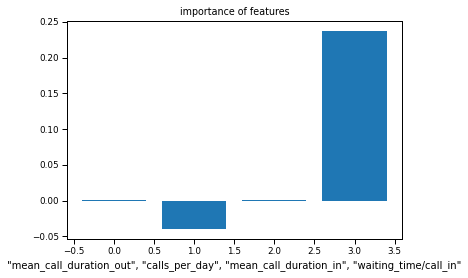

In [44]:
#creat plot for importance of parameters
plt.bar([x for x in range(len(importance))], importance)
plt.title('importance of features')
plt.xlabel('"mean_call_duration_out", "calls_per_day", "mean_call_duration_in", "waiting_time/call_in"')
plt.show()

The bar chart shows the coefficient and that the mean call duration has no impact on effectivnes of operator, the number of calls have a small impact on effectivness (the higher the number of calls the more ineffective is the operator). Only 'waiting time per call' has an effect on effectiveness of the operator 

In [45]:
# drop unnecessary features
final = final.drop(['mean_call_duration_out', 'mean_call_duration_in'], axis=1)
final.shape

(436, 4)

- Take a look at the Calls by typenumber of calls over time (daily) (incoming and outgoing; internal and external)
> minimum contact date = '2019-08-02', maximum contact date = '2019-11-28'
The number of calls in all call types and sum calls is increasing over time into more than 1000 calls daily on 2019-11-28. The call type with the lowest number are internal calls, followed by missed_calls and incoming calls. The highest number of calls can be found in external calls, followed by not missed calls and outgoing calls.

- Take a look at the number of calls per type: incoming and outgoing; internal and external
In the countplot:
> the number of internal calls are 5809 and the external calls are 39861.
the number of call directions are 13953 incoming and the number of outgoing calls are 31717.
the number of missed calls are 15517  and the number of not missed calls are 30153.

- Take a look at outgoing calls per operator:
> Number of outgoing calls has 882 entries and varies between 1 and 64897, with a mean of 758.89 and 101 as median. The first decentile of operator has conducted 3 calls in the last decentile 1790 are conducted per operator.

- Take a look at waiting time per operator:
> waiting time per incoming call has 446 entries and varies between 0.68 seconds and 115.5 seconds, with a mean of 16.28 second and 13.24 as median. The first decentile of operator has a waiting time of maximum 6.4 seconds in the last decentile the waiting time was almost 5 times higher with 30.24 seconds.

- Take a look at missed calls per operator:
> The number of all missed calls varies between 0 and 135 with a mean of 14 calls and a median of 6 calls. the first decentile of operatoer have no missid calls the last decentile 38 calls.

- Determine ineffective operators 
(In the case a lot of missing values in one of the categories, a deeper look will be made into this category and maybe will be replaced with an appropiate term - or not used at all )
>> performance scores 1 to 10 - The lower the number the more effective is the operator and otherwise the higher the performance score the more ineffective is the operator.
Summerize decile_call_out, decile_waiting_time, decile_mean_call_in, decile_mean_call_out and devide it by 4 (number of features)

- Creating a binary variable and extra column to mark an operator as ineffective (1) and effective (0) -  
> evenly spaced according to the values the performance is devided into effective vs ineffective (0 vs 1)
merge with in_out and drop unnecessary features, whicht weren't used to create the the performance feature remaining columns are operator_id, bad_performance, mean_call_duration_out, calls_per_day, mean_call_duration_in,waiting_time_call_in

-Use the logit likelihood method to find the most important parameter (which influences the outcome most)
> The Coefficient shows that 'waiting time per call' has afluents the effectiveness of the operator  and the number of calls has a small impact on the effectiveness of the operators

## Test Hypothesis:
Calculating if there exists really a difference between effective and ineffective operators by the average amount of the parameter which is conducted above. (by conducting a t-test)
See if there is a statistically significant difference with the metric of p-value

In [46]:
# normalize the distribution of the data by using the z-score
#threshold = 3

final['calls_z']= np.abs((final['calls_per_day'] - final['calls_per_day'].mean()) / final['calls_per_day'].std())
final['waiting_z']= np.abs((final['waiting_time_call_in'] - final['waiting_time_call_in'].mean()) / final['waiting_time_call_in'].std())
final1 = final.drop(final[(final['calls_z'] > 3) | (final['waiting_z'] > 3)].index)
final1 = final1.drop(['calls_z', 'waiting_z'], axis=1)

final1.shape

(428, 4)

In [47]:
#creating two dataframes for testing hypothesis, df_i (ineffective operator) & df_e (effective operator)
df_i = final1[final1['bad_performance']== 1]
df_e = final1[final1['bad_performance']== 0]
print(df_i.shape)
print(df_e.shape)

(199, 4)
(229, 4)


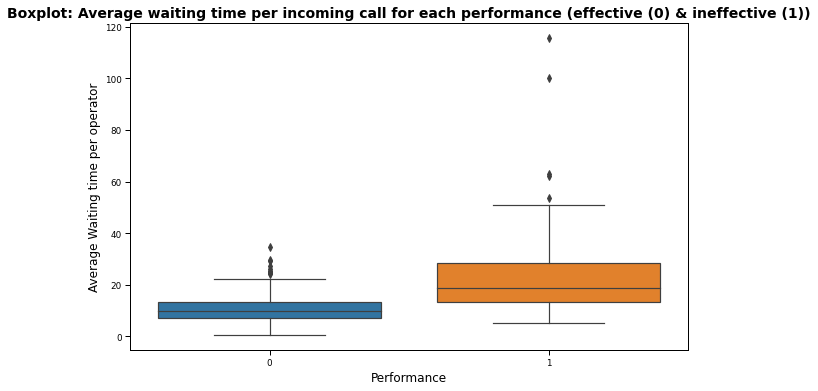

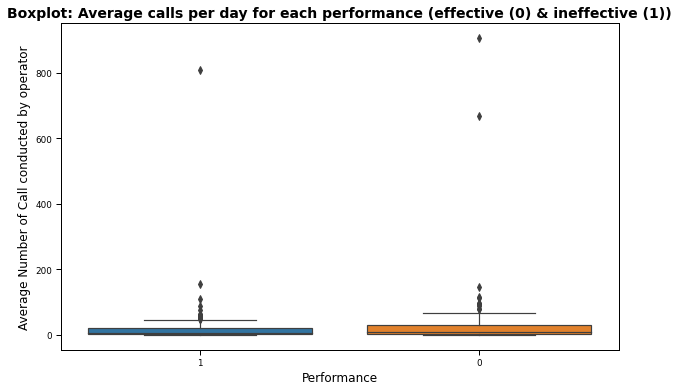

In [48]:
# creating boxplot for effectiv and ineffective operator for 'waiting_time_call_in' & 'calls_per_day'
ordered_df = final.groupby(['bad_performance'])['waiting_time_call_in'].sum().sort_values().reset_index()['bad_performance']

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'bad_performance', y = 'waiting_time_call_in', data = final, order = ordered_df)
plt.title('Boxplot: Average waiting time per incoming call for each performance (effective (0) & ineffective (1))', fontsize = 14, fontweight = 'bold') 
plt.xlabel('Performance', fontsize = 12) 
plt.ylabel('Average Waiting time per operator', fontsize = 12) 
plt.show()

ordered_df1 = final.groupby(['bad_performance'])['calls_per_day'].sum().sort_values().reset_index()['bad_performance']

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'bad_performance', y = 'calls_per_day', data = final, order = ordered_df1)
plt.title('Boxplot: Average calls per day for each performance (effective (0) & ineffective (1))', fontsize = 14, fontweight = 'bold') 
plt.xlabel('Performance', fontsize = 12) 
plt.ylabel('Average Number of Call conducted by operator', fontsize = 12) 

plt.show()

The first graph shows us the boxplot for the effectiveness of the performance of operators regarding average waiting time per operator; the second graph shows boxplot regarding the average number of calls per operator. 
A positive skewness can be found in effective and ineffective performance in number of calls and in ineffective performance per waiting time per calls.  A normal distribution exist in effective performance.

#### Hypothesis
>H0: df_i.waiting_time_call_in.mean() = df_e.waiting_time_call_in.mean()                          
H1: df_i.waiting_time_call_in.mean() != df_e.waiting_time_call_in.mean()                 

#### Statistical method used
Two sample T-test is used to find out the hypothesis. As an independent parametic sample test the two sample T-test want to determine the statistical significance (p-value) of two independent samples. 

The two samples based on two types of operetor (effective, ineffective), we want to find out if there exist any similarities(H0) or differences (H1) in the mean waiting time with threshold alpha< 0.05


In [49]:
#t-test: mean difference of order size between the groups using filtered data by waiting_time_call_in
df_i = final[final['bad_performance']== 1].waiting_time_call_in
df_e = final[final['bad_performance']== 0].waiting_time_call_in
#calculate the paired t-test statistic
statistic, p_value = ttest_ind(df_i, df_e)
print('test statistic=%.3f   significance level=%.3f' % (statistic, p_value))
if p_value < 0.05:
    print('A and B are Probably from different distributions')
else:
    print('A and B are Probably from the same distribution')

test statistic=11.820   significance level=0.000
A and B are Probably from different distributions


###  Average number of calls per day of effective and ineffective operator are the same
#### Hypothesis
>H0: df_i.calls_per_day.mean() = df_e.calls_per_day.mean()                          
H1: df_i.calls_per_day.mean() != df_e.calls_per_day.mean()                 

#### Statistical method used
Two sample T-test is used to find out the hypothesis. As an independent parametic sample test the two sample T-test want to determine the statistical significance (p-value) of two independent samples. 

The two samples based on two types of operetor (effective, ineffective), we want to find out if there exist any similarities(H0) or differences (H1) in the mean number of calls per day, with threshold alpha< 0.05

In [50]:
#t-test: mean difference of order size between the groups using filtered data by calls_per_day
df_i = final[final['bad_performance']== 1].calls_per_day
df_e = final[final['bad_performance']== 0].calls_per_day
#calculate the paired t-test statistic
statistic, p_value = ttest_ind(df_i, df_e)
print('test statistic=%.3f   significance level=%.3f' % (statistic, p_value))
if p_value < 0.05:
    print('A and B are Probably from different distributions')
else:
    print('A and B are Probably from the same distribution')

test statistic=-1.031   significance level=0.303
A and B are Probably from the same distribution


In [51]:
display(final1['waiting_time_call_in'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9]).round(2))


count    428.00
mean      15.68
std        9.61
min        0.70
10%        6.29
20%        8.09
30%        9.86
40%       11.24
50%       12.97
60%       15.34
70%       17.77
80%       22.06
90%       29.79
max       50.75
Name: waiting_time_call_in, dtype: float64

The distribution is normalized by using the z-score, with a threshold of 3 (sample reduced from 436 onto 428) than 2 samples are created for ttest effective operator(df_e) and ineffective operator(df_i). To take a look on the distribution of the beforehead conducted parameters 'waiting_time_call_in' and 'calls_per_day'

### Testing Hypothesis
####  Average waiting time of effective and ineffective operator are the same
>H0: df_i.waiting_time_call_in.mean() = df_e.waiting_time_call_in.mean()                          
H1: df_i.waiting_time_call_in.mean() != df_e.waiting_time_call_in.mean()                 

significance level~0.000 < alpha = 0.05; therfore ineffective Operator and effective operator have probably different distributions-> needed for further investigation

####  Average number of calls per day of effective and ineffective operator are the same
> H0: df_i.calls_per_day.mean() = df_e.calls_per_day.mean()                          
H1: df_i.calls_per_day.mean() != df_e.calls_per_day.mean()                 

significance level=0.303 > alpha = 0.05; therefore ineffective Operator and effective operator have probably the same distributions and it is not relevant for further investigation and suggestion


#### describe waiting time: for further suggestion
> 431 entries; mean 15.73; median 13.00; min 0.68; max 50.75, 10% 6.32; 20% 8.18; 30% 9.88

## Concluson & Suggestions

#### Conclusion
After taking a look on the data the effecitvness of operatore can be determined. First I want to mention the rising call volume (up to more than 1000 calls). The call have following types incoming/outgoing (13953/31717), internal/external (5809/39861) and missed/not missed (15517/30153).
Outgoing calls per operator, waiting time per operator and missed calls per operator are the main categories which can influence the operators performance 
To determine ineffective operators (missied incoming calls will not be used because of the high number of zeros). Finally following features are important to asses the effectiveness of the operators: number of outgoing calls, waiting time of incoming calls, mean duration of calls outgoing and incoming. For this parameters the decile is created (Decile_call_out, decile_waiting_time, decile_mean_call_in, decile_mean_call_out). These are summarized and divided by 4. This is the base for the binary variable, which are devided into effective and ineffective operators ( 0 and 1),  a performance level above 5.56 the operator is seen as ineffective. 
The Coefficient shows that 'waiting time per call' has afluents the effectiveness of the operator  and the number of calls has a small impact on the effectiveness of the operators. ‘Mean call duration’ has no impact on effectiveness of operator and are droped.

Testing the Hypothesis with ttest:
- Average waiting time 'waiting_time_call_in' of effective and ineffective operator are the same
- Average number of calls per day 'calls_per_day' of effective and ineffective operator are the same

The Result are that ineffective Operator and effective operator have probably different distributions and ineffective Operator and effective operator have probably the same distributions.

#### Suggestion
To improve the effectiveness of the operator a bonus system should be introduced: e.g. oriented on the decentiles of the feature 'waiting time per call'. A bonus of 150 or a voutcher can be offered for operators with an average waiting time over a month of lower than 6.4 seconds; 100 for operator with a lower average waiting time of 8.20 and 50 for a lower average waiting time of 9.8 

## Tableau

Tableau: <https://public.tableau.com/app/profile/andrea.oichtner/viz/typesofcalls/Dashboard1?publish=yes>

## Presentation

Presentation: <https://drive.google.com/file/d/1FaUl5so1chLC5uudUu_Kq1XuOYeCgI_e/view?usp=sharing> 

## References
- To determine the performance of the operator: <https://support.zendesk.com/hc/en-us/articles/213857548-Analyzing-your-Talk-activity>
- To find out the difference of qcut and cut for defining the decentile and quantile: 
<https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>
<https://stackoverflow.com/questions/44050696/pandas-using-qcut-on-series-with-fewer-values-than-quantiles>
https://machinelearningmastery.com/calculate-feature-importance-with-python/
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#the-query-method
